# PHYS 503 - Data Acquisition - Dr. Edward Brash
# Anne Haley - Sept 11 2020
# Assignment 1


---

Question 1: *Fitting - Uncertainties and Ranges*




In [48]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

def get_plot(xlow, xhigh):
  npts = 10
  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.5)
  xl = xlow + 0.01
  xmid = (xhigh+xlow)/2.0+0.01

  xi = np.linspace(xlow,xhigh,npts)
  yi = xi + yrandom

  sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
  plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
  plt.title("Error Bars on data with x range {}-{}".format(xlow, xhigh))
  plt.show()
  return sigmai


Ten x-value ranges of increasing size (starting near 0) and their uncertainties


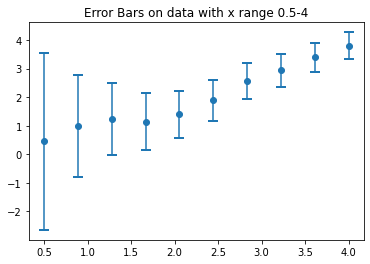

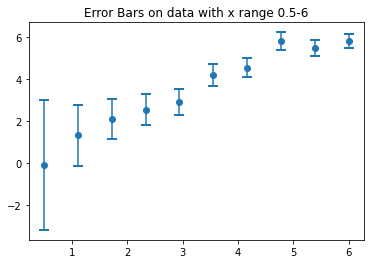

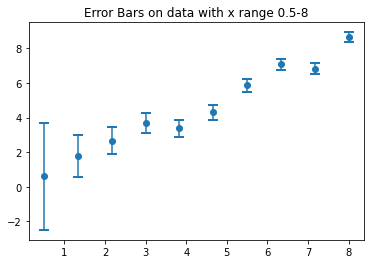

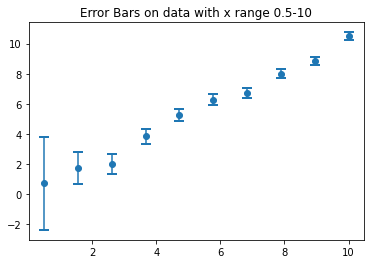

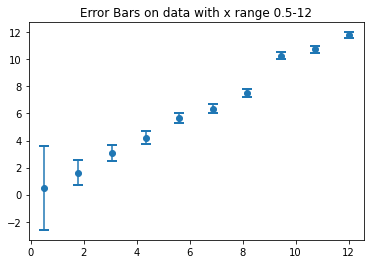

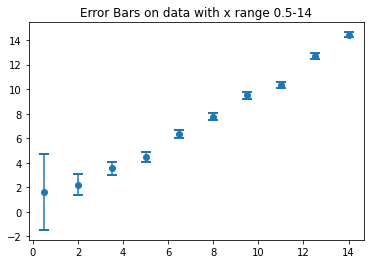

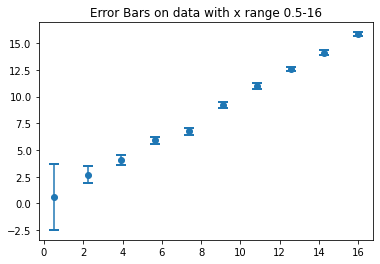

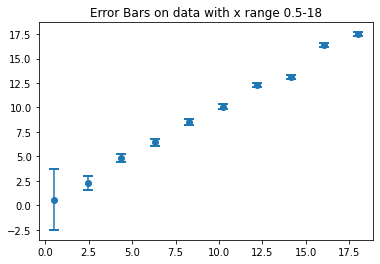

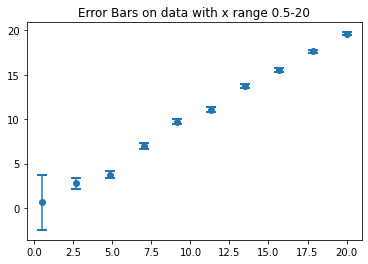

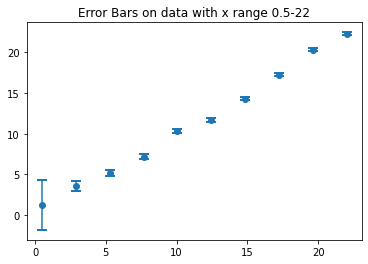

In [49]:
print("Ten x-value ranges of increasing size (starting near 0) and their uncertainties")

first_point_uncertainties = []
last_point_uncertainties = []
xranges = [2*n for n in range(2, 12)]
for xrange in xranges:
  uncertainties = get_plot(0.5, xrange)
  first_point_uncertainties.append(uncertainties[0])
  last_point_uncertainties.append(uncertainties[-1])


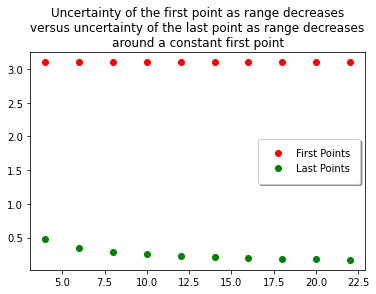

In [50]:
plt.plot(xranges, first_point_uncertainties, 'o', color="red", label="First Points")
plt.plot(xranges, last_point_uncertainties, 'o', color="green", label="Last Points")

plt.legend(fancybox=True, shadow=True, borderpad=1)
plt.title("Uncertainty of the first point as range decreases\nversus uncertainty of the last point as range decreases\naround a constant first point")
plt.show()

Ten x-value ranges of decreasing size (with a constant maximum of x=3000) and their uncertainties


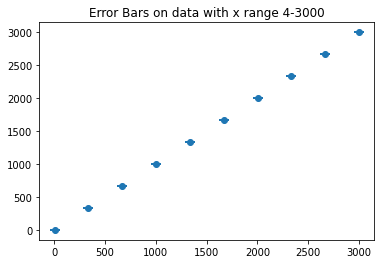

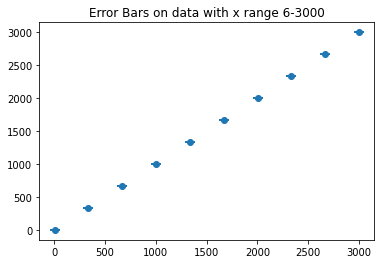

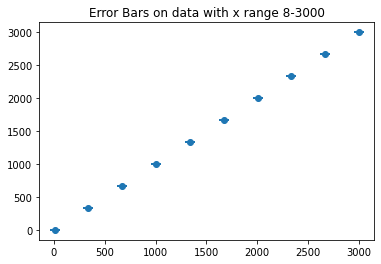

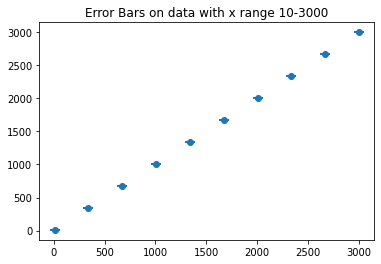

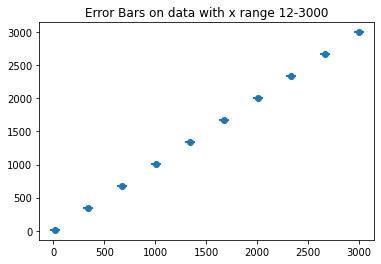

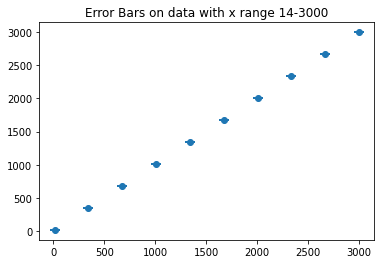

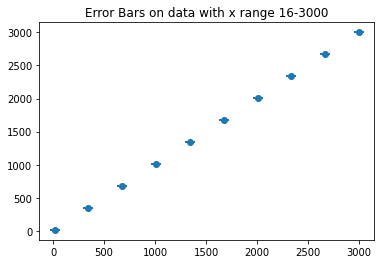

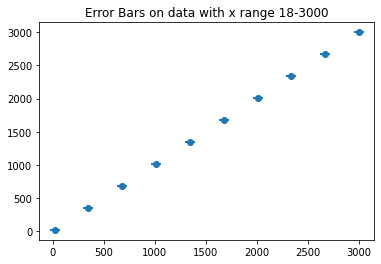

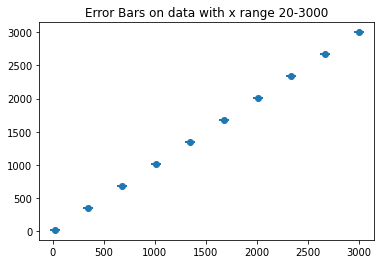

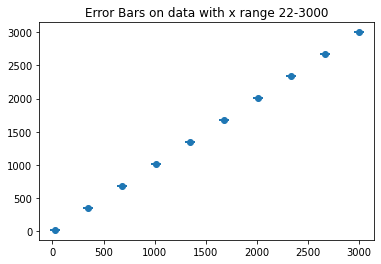

In [51]:
print("Ten x-value ranges of decreasing size (with a constant maximum of x=3000) and their uncertainties")

first_point_uncertainties = []
last_point_uncertainties = []
xranges = [2*n for n in range(2, 12)]
for xrange in xranges:
  uncertainties = get_plot(xrange, 3000)
  first_point_uncertainties.append(uncertainties[0])
  last_point_uncertainties.append(uncertainties[-1])

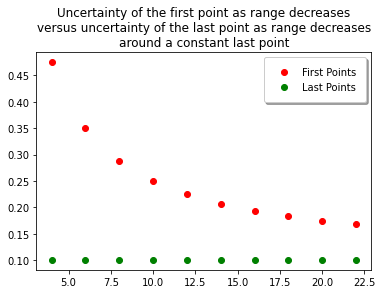

In [52]:
plt.plot(xranges, first_point_uncertainties, 'o', color="red", label="First Points")
plt.plot(xranges, last_point_uncertainties, 'o', color="green", label="Last Points")

plt.legend(fancybox=True, shadow=True, borderpad=1)
plt.title("Uncertainty of the first point as range decreases\nversus uncertainty of the last point as range decreases\naround a constant last point")
plt.show()

*What can you conclude from this study about the optimal experiment design?*

I took the liberty of showing an additional graph for each part, showing the functions of uncertainty for both the first and last point for both increasing and decreasing xranges.

The result I noticed is that for increasing xranges in which the first point is the same, the uncertainty for the first point stays the same. Likewise, for decreasing xranges in which the last point is the same, the uncertainty of the last point stays the same. However, for the changing xvalues (last on increasing range and first on decreasing range), their uncertainties are a logarithmic function of the range size.

Looking at the discrepancy between the red and green scatters for both increasing range and decreasing range, I notice that the smaller the range is, the greater the difference in uncertainty across data becomes. A greater xrange approaches a more constant uncertainty across data. Also, in general, smaller xvalues have larger uncertainties.






---

Question 2: *Why is it cold?*




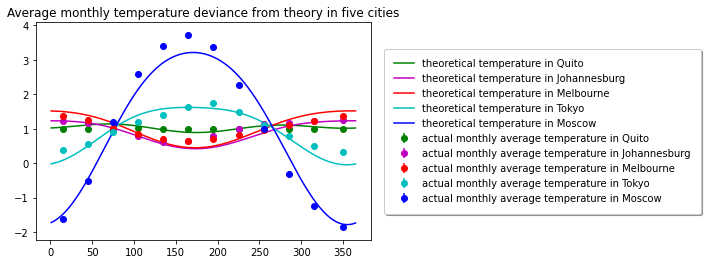

Scale factors and offsets required to give a reasonable fit for each city:
           City  Scale factor  Offset
0         Quito            12   -0.80
1  Johannesburg            12   -0.75
2     Melbourne            12   -0.40
3         Tokyo             6   -2.00
4        Moscow             3   -3.00


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mean(list):
  return sum(list)/len(list)

daysPerYear = 365.256363
dayOfYear = np.array([i for i in range(1,366)])
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

tempQuito = np.array([14, 14, 14, 13.9, 14.1, 13.6, 13.7, 13.8, 13.9, 14, 13.8, 14])
tempJohannesburg = np.array([19.9, 19.5, 18.6, 16, 12.8, 10, 10.3, 12.8, 15.8, 18.1, 18.6, 19.4])
tempMelbourne = np.array([20.1, 20.3, 18.6, 15.3, 12.4, 10.2, 9.4, 10.4, 12.1, 14.2, 16.2, 18.3])
tempTokyo = np.array([5.1, 5.8, 8.6, 14, 18.6, 21.8, 25.5, 27.3, 23.2, 17.5, 12.4, 7.7])
tempMoscow = np.array([-9.2, -8, -2.5, 5.9, 12.8, 16.8, 18.4, 16.6, 11.2, 4.9, -1.5, -6.2])

error = np.array([1 for i in range(12)])
error = error/mean(tempQuito)
tempQuito = tempQuito/mean(tempQuito)
tempJohannesburg = tempJohannesburg/mean(tempJohannesburg)
tempMelbourne = tempMelbourne/mean(tempMelbourne)
tempTokyo = tempTokyo/mean(tempTokyo)
tempMoscow = tempMoscow/mean(tempMoscow)

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

tiltAngle = -23.44*np.pi/180.0
angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))
angleQuito =          -0.180653     *np.pi/180.0 - angle
angleJohannesburg =   -26.204103    *np.pi/180.0 - angle
angleMelbourne =      -37.813629    *np.pi/180.0 - angle
angleTokyo =          35.689487     *np.pi/180.0 - angle
angleMoscow =         55.751244     *np.pi/180.0 - angle

tempQuitoTheory =         (np.cos(angleQuito)         *(relPower*24))
tempJohannesburgTheory =  (np.cos(angleJohannesburg)  *(relPower*24))
tempMelbourneTheory =     (np.cos(angleMelbourne)     *(relPower*24))
tempTokyoTheory =         (np.cos(angleTokyo)         *(relPower*24))
tempMoscowTheory =        (np.cos(angleMoscow)        *(relPower*24))


plt.plot(dayOfYear,(tempQuitoTheory-1)          /12 -0.8,   'g', label='theoretical temperature in Quito')
plt.plot(dayOfYear,(tempJohannesburgTheory-1)   /12 -0.75,  'm', label='theoretical temperature in Johannesburg')
plt.plot(dayOfYear,(tempMelbourneTheory-1)      /12 -0.4,   'r', label='theoretical temperature in Melbourne')
plt.plot(dayOfYear,(tempTokyoTheory-1)          /6 -2,      'c', label='theoretical temperature in Tokyo')
plt.plot(dayOfYear,(tempMoscowTheory-1)         /3 -3,      'b', label='theoretical temperature in Moscow')

plt.errorbar(month,tempQuito,         yerr=error,fmt='go', label='actual monthly average temperature in Quito')
plt.errorbar(month,tempJohannesburg,  yerr=error,fmt='mo', label='actual monthly average temperature in Johannesburg')
plt.errorbar(month,tempMelbourne,     yerr=error,fmt='ro', label='actual monthly average temperature in Melbourne')
plt.errorbar(month,tempTokyo,         yerr=error,fmt='co', label='actual monthly average temperature in Tokyo')
plt.errorbar(month,tempMoscow,        yerr=error,fmt='bo', label='actual monthly average temperature in Moscow')

plt.title("Average monthly temperature deviance from theory in five cities")
plt.legend(fancybox=True, shadow=True, borderpad=1, loc='center right', bbox_to_anchor=(2,0.5))
plt.show()

print("Scale factors and offsets required to give a reasonable fit for each city:")
scales_and_offsets = [['Quito', 12, -0.8],['Johannesburg', 12, -0.75],['Melbourne', 12, -0.4],['Tokyo', 6, -2],['Moscow', 3, -3]]
df = pd.DataFrame(scales_and_offsets)
df.columns = ['City', 'Scale factor', 'Offset']
df.style.hide_index()
print(df)


---

Question 3: *Kater's Penduluum*

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def graph_run(dfup, dfdown, xpos_small, dxpos_small, iteration):
  timeup = np.array(pd.to_numeric(dfup['Time']))
  periodup = []
  for k in range(2,len(timeup)):
      periodup.append(timeup[k]-timeup[k-2])
  periodup=np.array(periodup)
  semup = periodup.std()/np.sqrt(len(periodup))
  timedown = np.array(pd.to_numeric(dfdown['Time']))
  perioddown = []
  for k in range(2,len(timedown)):
      perioddown.append(timedown[k]-timedown[k-2])
  
  perioddown=np.array(perioddown)
  semdown = perioddown.std()/np.sqrt(len(perioddown))

  plt.plot(timeup[2:], periodup, 'o', color='b', label="Up period")
  plt.plot(timedown[2:], perioddown, 'o', color='c', label = "Down period")
  plt.title("Duration of up and down periods for iteration {}".format(iteration))
  plt.legend(fancybox=True, shadow=True, borderpad=1, loc='center right', bbox_to_anchor=(1.4,0.5))
  plt.show()
  return periodup.mean(), semup, perioddown.mean(), semdown



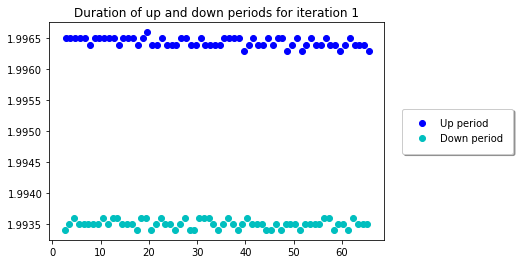

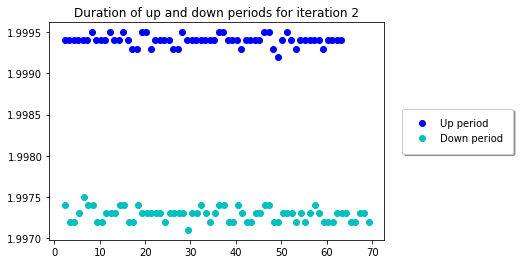

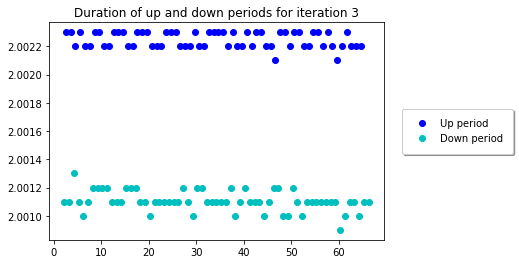

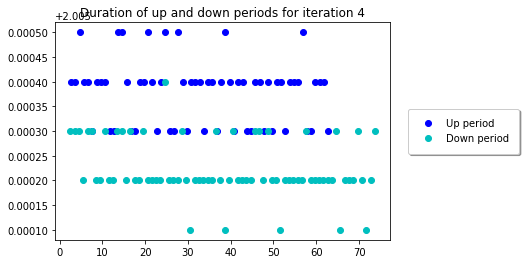

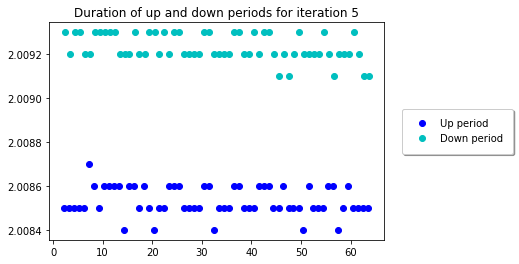

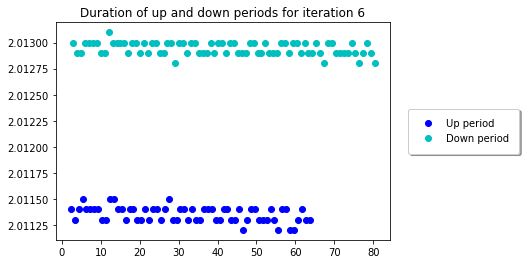

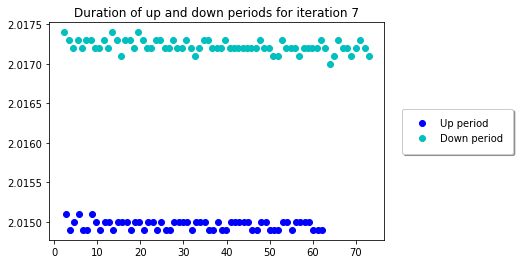

In [55]:
positions_url = 'https://raw.githubusercontent.com/brash99/phys421/master/JupyterNotebooks/KaterPendulum/data/scan2/kater_scan2_c2.dat'
positions_df = pd.read_csv(positions_url, '\t', header=None)
positions_df.columns = ['xpos_small', 'xpos_large', 'dxpos_small', 'dxpos_large']
xpos= positions_df['xpos_small'].values
dxpos = positions_df['dxpos_small'].values

tup = []
tdown = []
dtup = []
dtdown = []

for i in range(1, 8):
  url_up = 'https://raw.githubusercontent.com/brash99/phys421/master/JupyterNotebooks/KaterPendulum/data/scan2/kater_2_run{}.txt'.format(i*2)
  url_down = 'https://raw.githubusercontent.com/brash99/phys421/master/JupyterNotebooks/KaterPendulum/data/scan2/kater_2_run{}.txt'.format(i*2-1)
  df_up = pd.read_csv(url_up, '\t')
  df_down = pd.read_csv(url_down, '\t')
  periodup_mean, semup, perioddown_mean, semdown = graph_run(df_up, df_down, xpos, dxpos, i)
  tup.append(periodup_mean)
  dtup.append(semup)
  tdown.append(perioddown_mean)
  dtdown.append(semup)

tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)


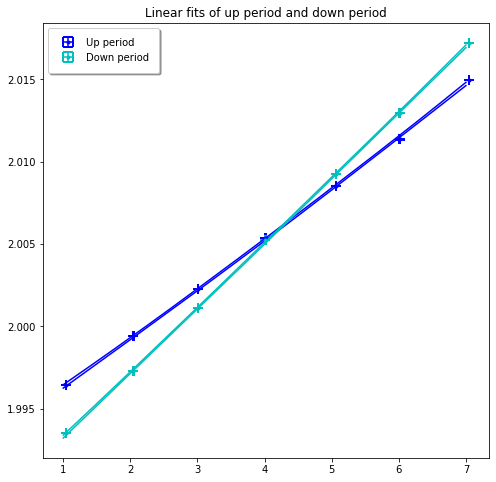

In [56]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 
axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='b.',capsize=5, capthick=2, label="Up period")
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='c.',capsize=5, capthick=2, label="Down period")

axs2.plot(xi,loweru,'b')
axs2.plot(xi,upperu,'b')
axs2.plot(xi,lowerd,'c')
axs2.plot(xi,upperd,'c')

plt.title("Linear fits of up period and down period")
plt.legend(fancybox=True, shadow=True, borderpad=1)
plt.show()

In [57]:

tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00598 +/- 0.00047


In [58]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg), 'compared to the known value of g in Newport News, 9.799')


g = 9.7972 +/- 0.0046 compared to the known value of g in Newport News, 9.799


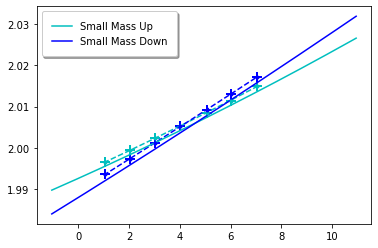

In [59]:

# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))

plt.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='c.',capsize=5, capthick=2)
plt.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='b.',capsize=5, capthick=2)

plt.plot(xi,middleu,'--', color='c')
plt.plot(xi,middled,'--', color='b')
plt.plot(xpos,t2,label='Small Mass Up', color='c')
plt.plot(xpos,t1,label='Small Mass Down', color='b')

plt.legend(fancybox=True, shadow=True, borderpad=1)
plt.show()